In [1]:
# ✅ Install required packages (optional if already available)
!pip install scikit-learn matplotlib seaborn --quiet

# ✅ Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# ✅ Load and prepare the dataset
iris = load_iris()
X = iris.data
y = iris.target

# ✅ Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
# --- k-NN Classifier ---
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

# --- Decision Tree Classifier ---
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
tree_preds = tree.predict(X_test)

# --- Support Vector Machine Classifier ---
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)


In [6]:
# ✅ Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n📌 {name} Classification Report:")
    print(classification_report(y_true, y_pred, target_names=iris.target_names))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()




📌 k-NN Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



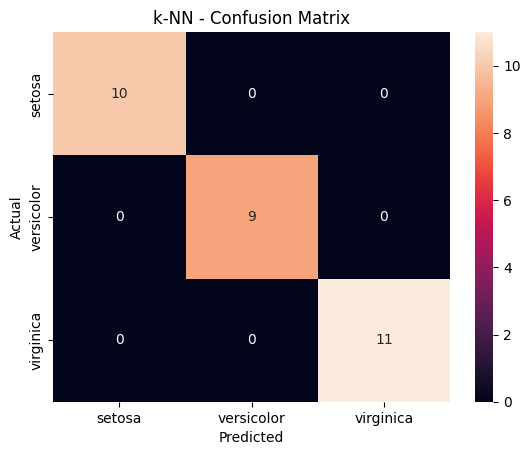


📌 Decision Tree Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



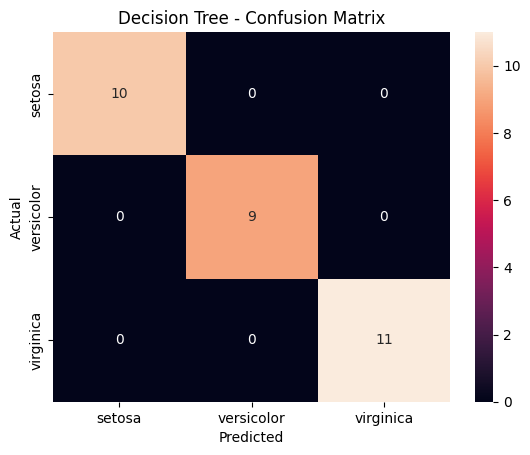


📌 SVM Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



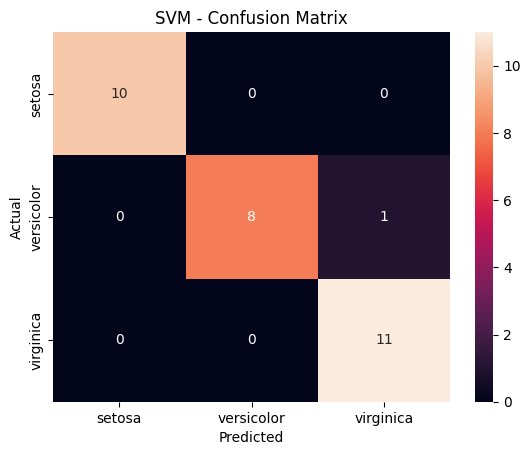

In [7]:
# ✅ Show performance
evaluate_model("k-NN", y_test, knn_preds)
evaluate_model("Decision Tree", y_test, tree_preds)
evaluate_model("SVM", y_test, svm_preds)